In [1]:
import pandas as pd
import numpy as np
file = '../../../DATA/OSA_class_bin.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)
df.head()
df = df.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
df.set_index('Patient', inplace=True)
df.head()

,Gender,Weight,Height,Age,Cervical,OSA,BMI
Patient,,,,,,,
P0005,1,80,173,32,40,Healthy,26.729927
P0006,1,109,190,32,42,Healthy,30.193906
P0007,1,86,169,39,42,Severe,30.110991
P0008,1,145,172,47,44,Severe,49.012980
P0013,1,90,180,36,40,Healthy,27.777778


In [2]:
#Index transformation--> NO HACE FALTA (?)wtf
#LABEL ENCODING
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['OSA_label']=le.fit_transform(df['OSA'])
df.head()


,Gender,Weight,Height,Age,Cervical,OSA,BMI,OSA_label
Patient,,,,,,,,
P0005,1,80,173,32,40,Healthy,26.729927,0
P0006,1,109,190,32,42,Healthy,30.193906,0
P0007,1,86,169,39,42,Severe,30.110991,1
P0008,1,145,172,47,44,Severe,49.012980,1
P0013,1,90,180,36,40,Healthy,27.777778,0


In [ ]:
df.head()

In [3]:
#features 
predictors = ['Gender','Weight', 'Height', 'Age', 'Cervical', 'BMI']

x = df[predictors].values
y = df['OSA_label'].values



# FUNCIONES PARA VISUALIZAR

In [4]:
import matplotlib.pyplot as plt
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
outcomes = ['Healthy','Severe']

accuracies = []

# Logistic Regression
### Grid search

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg_2 = LogisticRegression()
logreg_2_cv = GridSearchCV(logreg_2,param_grid,cv = 10)
logreg_2_cv.fit(x,y)
print("tuned hyperparameters 1: (best parameters): ", logreg_2_cv.best_params_)
print("accuracy: ", logreg_2_cv.best_score_)



/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
 

tuned hyperparameters 1: (best parameters):  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.7321341463414635


Accuracy for logistic regression 1:  0.7224028906955735
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       242
           1       0.69      0.56      0.62       165

    accuracy                           0.72       407
   macro avg       0.72      0.70      0.70       407
weighted avg       0.72      0.72      0.72       407



/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.

Confusion matrix, without normalization
[[207  35]
 [ 76  89]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       242
           1       0.72      0.54      0.62       165

    accuracy                           0.73       407
   macro avg       0.72      0.70      0.70       407
weighted avg       0.73      0.73      0.72       407

Accuracy for logistic regression 2:  0.7273110508882866
Area under the ROC:  0.6973829201101929
f1 score:  0.7176089521454209
Average precision-recall score: 0.57


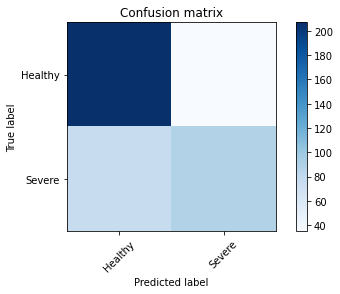

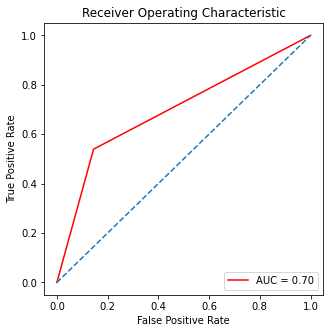

In [6]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

log_reg_1 = LogisticRegression(penalty='l1', solver='saga')
log_reg_2 = LogisticRegression(C = 0.001, penalty='l2')
y_fit = cross_validate(log_reg_2,x, y)

accuracy_reg1 = cross_val_score(log_reg_1, x, y, cv = 5)
y_out1 = cross_val_predict(log_reg_1, x, y, cv=5)
report1=metrics.classification_report(y, y_out1)


print("Accuracy for logistic regression 1: ", np.average(accuracy_reg1))
print(report1)


accuracy_reg2 = cross_val_score(log_reg_2, x, y, cv = 5)
y_out2 = cross_val_predict(log_reg_2, x, y, cv=5)
report2=metrics.classification_report(y, y_out2)
f1_reg= cross_val_score(log_reg_2, x, y, cv = 5, scoring='f1_weighted')

### PLOT CONFUSION MATRIX ###
# Not normalized
cm = metrics.confusion_matrix(y, y_out2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out2)
roc_auc_reg = auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_reg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_reg = average_precision_score(y, y_out2)

print(report2)
print("Accuracy for logistic regression 2: ", np.average(accuracy_reg2))
print("Area under the ROC: ", roc_auc_reg)
print("f1 score: ", np.average(f1_reg))
print('Average precision-recall score: {0:0.2f}'.format(average_precision_reg))

# KNN

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors" :np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv = 10)
knn_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ", knn_cv.best_params_)
print("accuracy: ", knn_cv.best_score_)

tuned hyperparameters: (best parameters):  {'n_neighbors': 9}
accuracy:  0.7566463414634146


Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       242
           1       0.69      0.64      0.66       165

    accuracy                           0.74       407
   macro avg       0.73      0.72      0.72       407
weighted avg       0.73      0.74      0.74       407

Average accuracy of KNN: 0.7370671484492621
Area under the ROC 0.722038567493113
f1 score:  0.7348163350483793
Average precision-recall score: 0.59


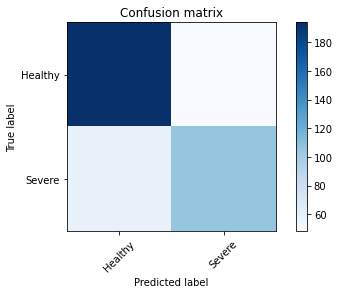

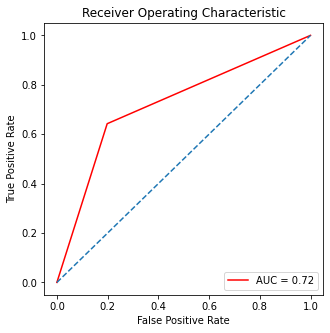

In [8]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

knn = KNeighborsClassifier(n_neighbors=9)
accuracy_knn = cross_val_score(knn, x, y, cv=5, scoring='accuracy')
f1_knn= cross_val_score(knn, x, y, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(knn, x, y, cv=5)
report_knn = metrics.classification_report(y, y_out)


#Compute roc_auc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)

from sklearn.metrics import average_precision_score
average_precision_knn = average_precision_score(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, outcomes)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


print(report_knn)
print('Average accuracy of KNN:', np.average(accuracy_knn))
print ("Area under the ROC", roc_auc_knn)
print ("f1 score: ", np.average(f1_knn))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_knn))

# SVM

### Linear

Confusion matrix, without normalization
[[213  29]
 [ 90  75]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       242
           1       0.72      0.45      0.56       165

    accuracy                           0.71       407
   macro avg       0.71      0.67      0.67       407
weighted avg       0.71      0.71      0.69       407

Average accuracy of svm: 0.7075579644685336
Area under the ROC: 0.6673553719008265
f1 score : 0.6894776148836506
Average precision-recall score: 0.55


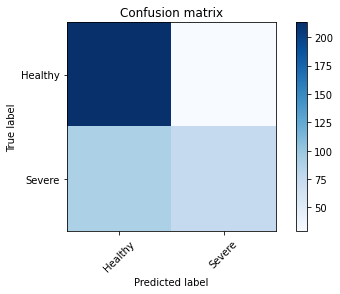

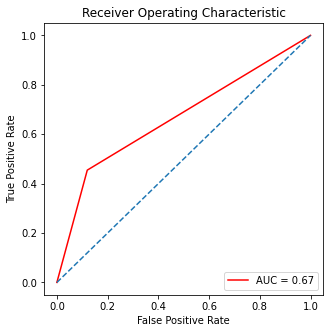

In [9]:
from sklearn.svm import SVC
svm = SVC()
accuracy_svm = cross_val_score(svm, x, y, cv=5, scoring='accuracy')
f1_svm = cross_val_score(svm, x, y, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(svm, x, y, cv=5)
#Report 
report_svm = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_svm = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_svm = average_precision_score(y, y_out)

print(report_svm)
print('Average accuracy of svm:', np.average(accuracy_svm))
print ("Area under the ROC:", roc_auc_svm)
print ("f1 score :", np.average(f1_svm))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_svm))


# Decision Tree

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth" :np.arange(0,7)}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_grid,cv = 10)
tree_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ", tree_cv.best_params_)
print("accuracy: ", tree_cv.best_score_)

tuned hyperparameters: (best parameters):  {'max_depth': 4}
accuracy:  0.7296341463414634


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:54

### default

Confusion matrix, without normalization
[[175  67]
 [ 76  89]]
              precision    recall  f1-score   support

           0       0.70      0.72      0.71       242
           1       0.57      0.54      0.55       165

    accuracy                           0.65       407
   macro avg       0.63      0.63      0.63       407
weighted avg       0.65      0.65      0.65       407

Average accuracy of tree: 0.648900933453779
Area under the ROC 0.631267217630854
f1 score: 0.6488966058385622
Average precision-recall score: 0.49


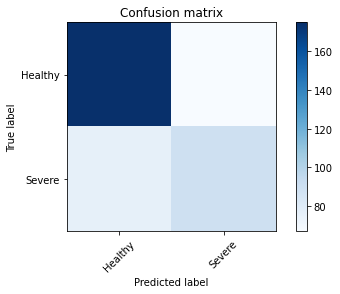

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
accuracy_tree = cross_val_score(tree, x, y, cv=5, scoring='accuracy')
f1_tree = cross_val_score(tree, x, y, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(tree, x, y, cv=5)
#Report 
report_tree = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate_def, true_positive_rate_def, thresholds = roc_curve(y, y_out)
roc_auc_tree_def = auc(false_positive_rate_def, true_positive_rate_def)

from sklearn.metrics import average_precision_score
average_precision_tree = average_precision_score(y, y_out)

print(report_tree)
print('Average accuracy of tree:', np.average(accuracy_tree))
print ("Area under the ROC", roc_auc_tree_def)
print ("f1 score:", np.average(f1_tree))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_tree))

### 4 = max_depth

Confusion matrix, without normalization
[[183  59]
 [ 61 104]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       242
           1       0.64      0.63      0.63       165

    accuracy                           0.71       407
   macro avg       0.69      0.69      0.69       407
weighted avg       0.70      0.71      0.70       407

Average accuracy of tree: 0.7054501656127672
Area under the ROC 0.6932506887052342
f1 score: 0.7002641872939679
Average precision-recall score: 0.55


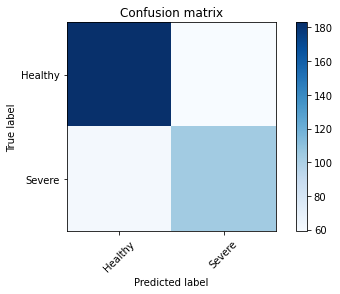

In [12]:
tree = DecisionTreeClassifier(max_depth=4)
accuracy_tree = cross_val_score(tree, x, y, cv=5, scoring='accuracy')
f1_tree = cross_val_score(tree, x, y, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(tree, x, y, cv=5)
#Report 
report_tree = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate_def2, true_positive_rate_def2, thresholds = roc_curve(y, y_out)
roc_auc_tree_def2 = auc(false_positive_rate_def2, true_positive_rate_def2)

from sklearn.metrics import average_precision_score
average_precision_tree = average_precision_score(y, y_out)

print(report_tree)
print('Average accuracy of tree:', np.average(accuracy_tree))
print ("Area under the ROC", roc_auc_tree_def2)
print ("f1 score:", np.average(f1_tree))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_tree))

Text(0.5, 0, 'False Positive Rate')

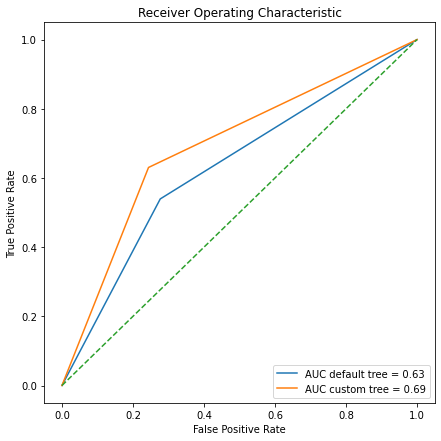

In [13]:
# Plot ROC 2 decision trees
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_def,true_positive_rate_def,label = 'AUC default tree = %0.2f' % roc_auc_tree_def)
plt.plot(false_positive_rate_def2,true_positive_rate_def2,label = 'AUC custom tree = %0.2f' % roc_auc_tree_def2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Ensemble learning

### intento comparar diferentes ensembles: random forest, adaboosting, gradient boosting

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

forest = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(100, 150)}
forest_cv = GridSearchCV(forest,param_grid,cv = 5)
forest_cv.fit(x,y)
print("tuned hyperparameters forest: (best parameters): ", forest_cv.best_params_)





tuned hyperparameters forest: (best parameters):  {'n_estimators': 102}


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier()
param_grid = {'n_estimators': np.arange(50, 100)}
ada_cv = GridSearchCV(ada,param_grid,cv = 5)
ada_cv.fit(x,y)
print("tuned hyperparameters ada: (best parameters): ", ada_cv.best_params_)


tuned hyperparameters ada: (best parameters):  {'n_estimators': 51}


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

gradient = GradientBoostingClassifier()
param_grid = {'n_estimators': np.arange(100, 200), 'learning_rate': np.arange(0.1, 0.5)}
gradient_cv = GridSearchCV(gradient,param_grid,cv = 5)
gradient_cv.fit(x,y)
print("tuned hyperparameters gradient: (best parameters): ", gradient_cv.best_params_)


tuned hyperparameters gradient: (best parameters):  {'learning_rate': 0.1, 'n_estimators': 104}


In [ ]:
acc_ensemble = pd.DataFrame({'Random Forest': [],
                        'Ada Boosting':   [],
                        'Gradient Boostin': []})

In [ ]:
acc_ensemble

In [ ]:
acc = pd.DataFrame(index=['Random Forest', 'Ada Boosting', 'Gradient Boosting'])
acc

Confusion matrix, without normalization
[[190  52]
 [ 61 104]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       242
           1       0.67      0.63      0.65       165

    accuracy                           0.72       407
   macro avg       0.71      0.71      0.71       407
weighted avg       0.72      0.72      0.72       407

Average accuracy of tree: 0.7248720264980426
Area under the ROC 0.7077134986225896
f1 score:  0.7150478445596637
Average precision-recall score: 0.57


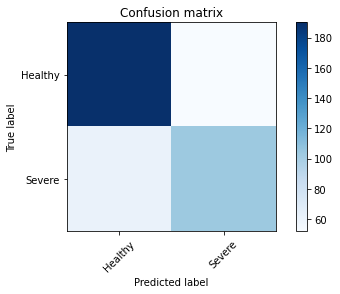

In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
forest = RandomForestClassifier(n_estimators=135)
accuracy_forest = cross_val_score(forest, x, y, cv=5, scoring='accuracy')
f1_forest = cross_val_score(forest, x, y, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(forest, x, y, cv=5)
#Report 
report_forest = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate_1, true_positive_rate_1, thresholds = roc_curve(y, y_out)
roc_auc_forest = auc(false_positive_rate_1, true_positive_rate_1)


from sklearn.metrics import average_precision_score
average_precision_forest = average_precision_score(y, y_out)

print(report_forest)
print('Average accuracy of tree:', np.average(accuracy_forest))
print ("Area under the ROC", roc_auc_forest)
print ("f1 score: ", np.average(f1_forest))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_forest))

Confusion matrix, without normalization
[[193  49]
 [ 75  90]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       242
           1       0.65      0.55      0.59       165

    accuracy                           0.70       407
   macro avg       0.68      0.67      0.67       407
weighted avg       0.69      0.70      0.69       407

Average accuracy of tree: 0.6953327311050888
Area under the ROC 0.6714876033057852
f1 score:  0.6895912338314278
Average precision-recall score: 0.54


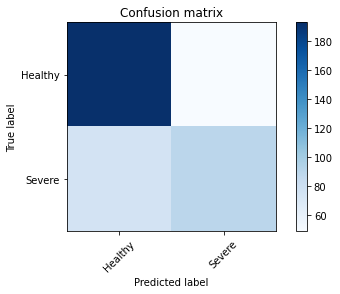

In [18]:
ada = AdaBoostClassifier(n_estimators=51)
accuracy_ada = cross_val_score(ada, x, y, cv=5, scoring='accuracy')
f1_ada = cross_val_score(ada, x, y, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(ada, x, y, cv=5)
#Report 
report_ada = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate_2, true_positive_rate_2, thresholds = roc_curve(y, y_out)
roc_auc_ada = auc(false_positive_rate_2, true_positive_rate_2)

from sklearn.metrics import average_precision_score
average_precision_ada = average_precision_score(y, y_out)

print(report_ada)
print('Average accuracy of tree:', np.average(accuracy_ada))
print ("Area under the ROC", roc_auc_ada)
print ("f1 score: ", np.average(f1_ada))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_ada))

Confusion matrix, without normalization
[[185  57]
 [ 59 106]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       242
           1       0.65      0.64      0.65       165

    accuracy                           0.71       407
   macro avg       0.70      0.70      0.70       407
weighted avg       0.71      0.71      0.71       407

Average accuracy of tree: 0.719993977717555
Area under the ROC 0.7034435261707989
f1 score:  0.7184126685770563
Average precision-recall score: 0.56


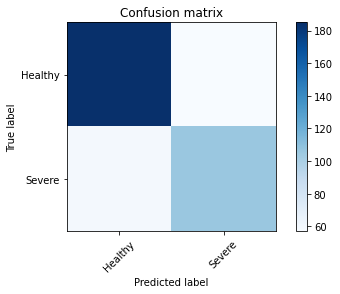

In [19]:
grad = GradientBoostingClassifier(n_estimators=102)
accuracy_grad = cross_val_score(grad, x, y, cv=5, scoring='accuracy')
f1_grad = cross_val_score(grad, x, y, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(grad, x, y, cv=5)
#Report 
report_grad = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate_3, true_positive_rate_3, thresholds = roc_curve(y, y_out)
roc_auc_grad = auc(false_positive_rate_3, true_positive_rate_3)


from sklearn.metrics import average_precision_score
average_precision_grad = average_precision_score(y, y_out)

print(report_grad)
print('Average accuracy of tree:', np.average(accuracy_grad))
print ("Area under the ROC", roc_auc_grad)
print ("f1 score: ", np.average(f1_grad))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_grad))

Text(0.5, 0, 'False Positive Rate')

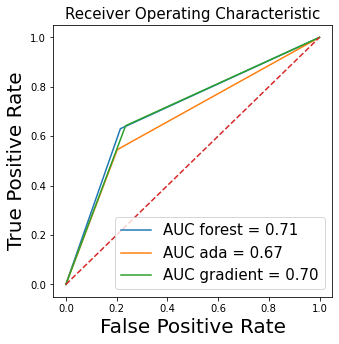

In [20]:
# Plot ROC of three ensemble models
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.plot(false_positive_rate_1,true_positive_rate_1,label = 'AUC forest = %0.2f' % roc_auc_forest)
plt.plot(false_positive_rate_2,true_positive_rate_2,label = 'AUC ada = %0.2f' % roc_auc_ada)
plt.plot(false_positive_rate_3,true_positive_rate_3,label = 'AUC gradient = %0.2f' % roc_auc_grad)
plt.legend(loc = 'lower right', fontsize=15)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)


Text(0, 0.5, 'Accuracy')

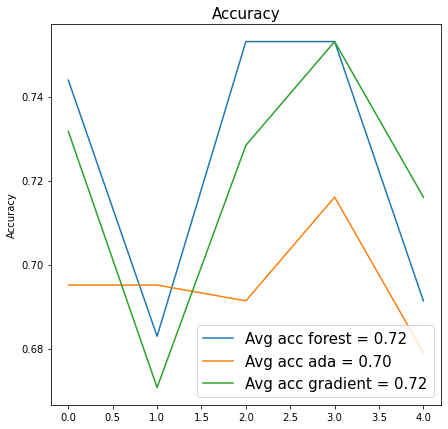

In [21]:
# Plot accuracy of three ensemble models
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('Accuracy', fontsize = 15)
plt.plot(accuracy_forest,label = 'Avg acc forest = %0.2f' % np.average(accuracy_forest))
plt.plot(accuracy_ada,label = 'Avg acc ada = %0.2f' % np.average(accuracy_ada))
plt.plot(accuracy_grad,label = 'Avg acc gradient = %0.2f' % np.average(accuracy_grad))
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('Accuracy')


Confusion matrix, without normalization
[[194  48]
 [ 62 103]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       242
           1       0.68      0.62      0.65       165

    accuracy                           0.73       407
   macro avg       0.72      0.71      0.72       407
weighted avg       0.73      0.73      0.73       407

Average accuracy of tree: 0.719993977717555
Area under the ROC 0.7129476584022039
f1 score:  0.7267677064661782
Average precision-recall score: 0.58


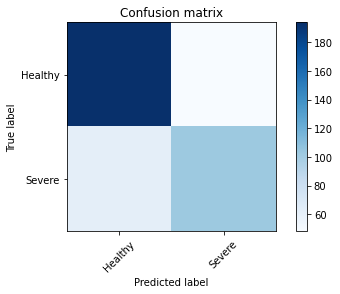

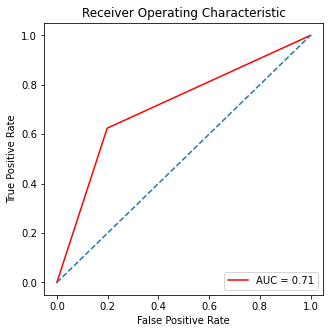

In [22]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
accuracy_bayes = cross_val_score(grad, x, y, cv=5, scoring='accuracy')
f1_bayes = cross_val_score(bayes, x, y, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(bayes, x, y, cv=5)
#Report 
report_bayes = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_bayes = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_bayes)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


from sklearn.metrics import average_precision_score
average_precision_bayes = average_precision_score(y, y_out)

print(report_bayes)
print('Average accuracy of tree:', np.average(accuracy_bayes))
print ("Area under the ROC", roc_auc_bayes)
print ("f1 score: ", np.average(f1_bayes))
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_bayes))

Text(0.5, 0, 'Cross validation')

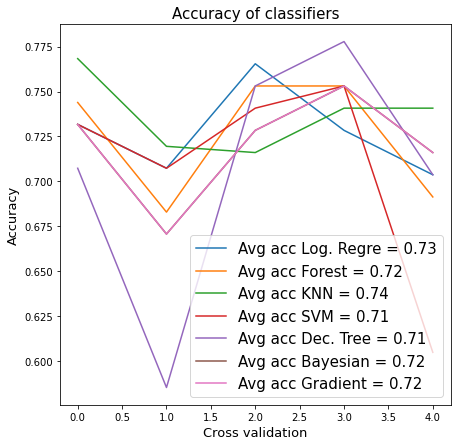

In [23]:
# Plot accuracy of three ensemble models
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('Accuracy of classifiers', fontsize = 15)
plt.plot(accuracy_reg2,label = 'Avg acc Log. Regre = %0.2f' % np.average(accuracy_reg2))
plt.plot(accuracy_forest, label = 'Avg acc Forest = %0.2f' % np.average(accuracy_forest))
plt.plot(accuracy_knn,label = 'Avg acc KNN = %0.2f' % np.average(accuracy_knn))
plt.plot(accuracy_svm, label = 'Avg acc SVM = %0.2f' % np.average(accuracy_svm))
plt.plot(accuracy_tree, label = 'Avg acc Dec. Tree = %0.2f' % np.average(accuracy_tree))
plt.plot(accuracy_bayes, label = 'Avg acc Bayesian = %0.2f' % np.average(accuracy_bayes))
plt.plot(accuracy_grad, label = 'Avg acc Gradient = %0.2f' % np.average(accuracy_grad))
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Cross validation', fontsize=13)

In [ ]:
acc_models = pd.DataFrame({})
acc_models

In [24]:
acc_models = pd.DataFrame({})

models = {"Logistic Regresion":accuracy_reg2,
          "KNN":accuracy_knn,
          "SVM": accuracy_svm,
          "Decision Tree": accuracy_tree,
          "Random Forest": accuracy_forest,
          "Gradient boosting": accuracy_grad,
          "Bayesian": accuracy_bayes}
j=0
for name in models:
    print(name)
    i=0
    values = []
    for i in models[name]:
        #array = models[name]
        #print(array)
        
        values.append(i)
        #print(i)
        i+=1  
        
    print(values)
    acc_models.loc[:,j] = [name, values[0], values[1], values[2], values[3], values[4]]
    #acc_models.loc[:,j] = [name,values[0], values[1], values[2], values[3], values[4]]
    j+=1


Logistic Regresion
[0.7317073170731707, 0.7073170731707317, 0.7654320987654321, 0.7283950617283951, 0.7037037037037037]
KNN
[0.7682926829268293, 0.7195121951219512, 0.7160493827160493, 0.7407407407407407, 0.7407407407407407]
SVM
[0.7317073170731707, 0.7073170731707317, 0.7407407407407407, 0.7530864197530864, 0.6049382716049383]
Decision Tree
[0.7073170731707317, 0.5853658536585366, 0.7530864197530864, 0.7777777777777778, 0.7037037037037037]
Random Forest
[0.7439024390243902, 0.6829268292682927, 0.7530864197530864, 0.7530864197530864, 0.691358024691358]
Gradient boosting
[0.7317073170731707, 0.6707317073170732, 0.7283950617283951, 0.7530864197530864, 0.7160493827160493]
Bayesian
[0.7317073170731707, 0.6707317073170732, 0.7283950617283951, 0.7530864197530864, 0.7160493827160493]


In [25]:
acc_models

,0,1,2,3,4,5,6
0,Logistic Regresion,KNN,SVM,Decision Tree,Random Forest,Gradient boosting,Bayesian
1,0.731707,0.768293,0.731707,0.707317,0.743902,0.731707,0.731707
2,0.707317,0.719512,0.707317,0.585366,0.682927,0.670732,0.670732
3,0.765432,0.716049,0.740741,0.753086,0.753086,0.728395,0.728395
4,0.728395,0.740741,0.753086,0.777778,0.753086,0.753086,0.753086
5,0.703704,0.740741,0.604938,0.703704,0.691358,0.716049,0.716049


In [ ]:
f1 = []
f1.append(f1_reg)
f1.append(f1_knn)
print(f1)


Text(0.5, 0, 'Cross validation')

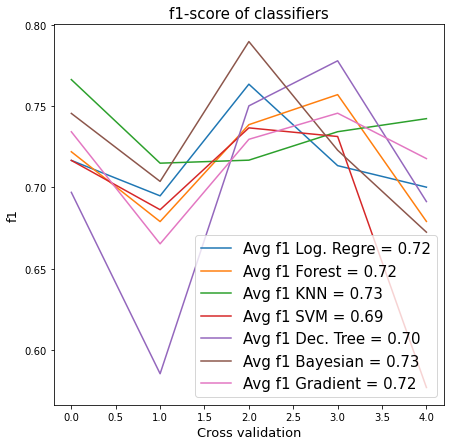

In [26]:
# Plot f1 ofall models
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('f1-score of classifiers', fontsize = 15)
plt.plot(f1_reg,label = 'Avg f1 Log. Regre = %0.2f' % np.average(f1_reg))
plt.plot(f1_forest, label = 'Avg f1 Forest = %0.2f' % np.average(f1_forest))
plt.plot(f1_knn,label = 'Avg f1 KNN = %0.2f' % np.average(f1_knn))
plt.plot(f1_svm, label = 'Avg f1 SVM = %0.2f' % np.average(f1_svm))
plt.plot(f1_tree, label = 'Avg f1 Dec. Tree = %0.2f' % np.average(f1_tree))
plt.plot(f1_bayes, label = 'Avg f1 Bayesian = %0.2f' % np.average(f1_bayes))
plt.plot(f1_grad, label = 'Avg f1 Gradient = %0.2f' % np.average(f1_grad))
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('f1', fontsize=13)
plt.xlabel('Cross validation', fontsize=13)

In [ ]:
pre_rec = []
pre_rec.append(average_precision_reg)
pre_rec.append(average_precision_forest)
pre_rec.append(average_precision_knn)
pre_rec.append(average_precision_tree)
pre_rec.append(average_precision_svm)
pre_rec.append(average_precision_forest)
pre_rec.append(average_precision_grad)
pre_rec.append(average_precision_bayes)
print(pre_rec)

In [ ]:
pre_rec_names = ['Log. Reg', 'Forest', 'KNN', 'Tree', 'SVM', 'Forest', 'Grad.', 'Bayes']
print(pre_rec_names)

In [ ]:
results = pd.DataFrame[]

Text(0.5, 0, 'Model')

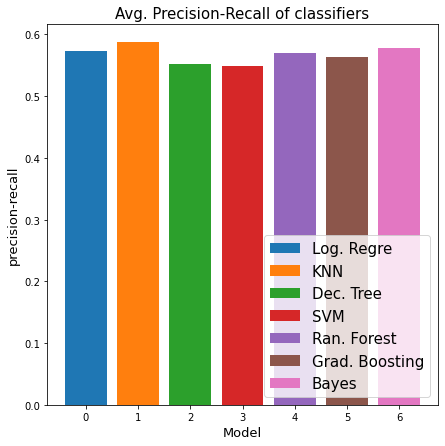

In [27]:
# Plot f1 ofall models
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('Avg. Precision-Recall of classifiers', fontsize = 15)
plt.bar(0, average_precision_reg,label = 'Log. Regre')
plt.bar(1, average_precision_knn,label = 'KNN')
plt.bar(2, average_precision_tree,label = 'Dec. Tree')
plt.bar(3, average_precision_svm,label = 'SVM')
plt.bar(4, average_precision_forest,label = 'Ran. Forest')
plt.bar(5, average_precision_grad,label = 'Grad. Boosting')
plt.bar(6, average_precision_bayes,label = 'Bayes')
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('precision-recall', fontsize=13)
plt.xlabel('Model', fontsize=13)

Text(0.5, 0, 'Model')

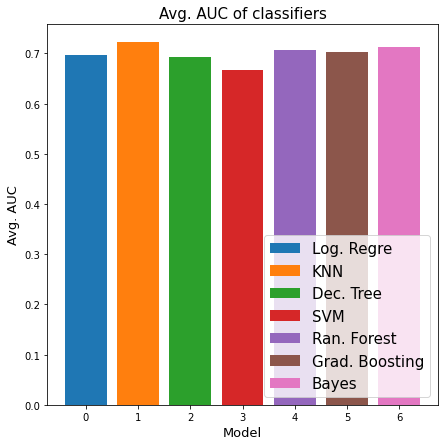

In [28]:
# Plot auc_roc ofall models
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('Avg. AUC of classifiers', fontsize = 15)
plt.bar(0, roc_auc_reg,label = 'Log. Regre')
plt.bar(1, roc_auc_knn,label = 'KNN')
plt.bar(2, roc_auc_tree_def2,label = 'Dec. Tree')
plt.bar(3, roc_auc_svm,label = 'SVM')
plt.bar(4, roc_auc_forest,label = 'Ran. Forest')
plt.bar(5, roc_auc_grad,label = 'Grad. Boosting')
plt.bar(6, roc_auc_bayes,label = 'Bayes')
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('Avg. AUC', fontsize=13)
plt.xlabel('Model', fontsize=13)

# Multiclass classification

In [29]:
outcomes_m = ['Healthy','Mild','Severe']

In [30]:
import pandas as pd
import numpy as np
file_multi = '../../../DATA/OSA_class.xlsx'
data_multi = pd.read_excel(file_multi)
df_multi = pd.DataFrame(data_multi)
df_multi.head()

,Patient,Gender,IAH,Weight,Height,Age,Cervical,Smoker,Snorer,Illness,OSA,BMI
0,P0002,1,29.6,119,174,56,48.0,5,4,2,Mild,39.305060
1,P0004,1,19.7,78,168,39,42.0,2,4,2,Mild,27.636054
2,P0005,1,9.0,80,173,32,40.0,2,4,2,Healthy,26.729927
3,P0006,1,2.0,109,190,32,42.0,2,4,2,Healthy,30.193906
4,P0007,1,34.0,86,169,39,42.0,2,4,2,Severe,30.110991


In [31]:
df_multi = df_multi.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
#Index transformation--> NO HACE FALTA (?)wtf
#LABEL ENCODING
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_multi['OSA_label']=le.fit_transform(df_multi['OSA'])
df_multi.head()


,Patient,Gender,Weight,Height,Age,Cervical,OSA,BMI,OSA_label
0,P0002,1,119,174,56,48.0,Mild,39.305060,1
1,P0004,1,78,168,39,42.0,Mild,27.636054,1
2,P0005,1,80,173,32,40.0,Healthy,26.729927,0
3,P0006,1,109,190,32,42.0,Healthy,30.193906,0
4,P0007,1,86,169,39,42.0,Severe,30.110991,2


In [32]:
df_multi.set_index('Patient', inplace=True)

#encoded
x_m = df_multi[predictors].values
y_m = df_multi['OSA_label'].values

In [ ]:
x_m

## Logistic Regression
# grid search

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv = 10)
logreg_cv.fit(x_m,y_m)
print("tuned hyperparameters 1: (best parameters): ", logreg_cv.best_params_)
print("accuracy: ", logreg_cv.best_score_)



/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

tuned hyperparameters 1: (best parameters):  {'C': 100.0, 'penalty': 'l2'}
accuracy:  0.505530753968254


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

Confusion matrix, without normalization
[[164  63  15]
 [ 92  92  44]
 [ 40  69  56]]
              precision    recall  f1-score   support

           0       0.55      0.68      0.61       242
           1       0.41      0.40      0.41       228
           2       0.49      0.34      0.40       165

    accuracy                           0.49       635
   macro avg       0.48      0.47      0.47       635
weighted avg       0.49      0.49      0.48       635

Accuracy for logistic regression 2:  0.49133858267716535
f1 score:  0.47217293879289385


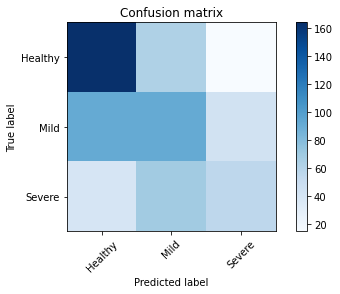

In [34]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

log_reg_m = LogisticRegression(C = 100, penalty='l2')

accuracy_reg_m = cross_val_score(log_reg_m, x_m, y_m, cv = 5)
y_out = cross_val_predict(log_reg_m, x_m, y_m, cv=5)
f1_reg_m= cross_val_score(log_reg_2, x_m, y_m, cv = 5, scoring='f1_weighted')
report=metrics.classification_report(y_m, y_out)

### PLOT CONFUSION MATRIX ###
# Not normalized
cm = metrics.confusion_matrix(y_m, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes_m)


print(report)
print("Accuracy for logistic regression 2: ", np.average(accuracy_reg_m))
print("f1 score: ", np.average(f1_reg_m))

# KNN 
## grid search 

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors" :np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv = 10)
knn_cv.fit(x_m,y_m)

print("tuned hyperparameters: (best parameters): ", knn_cv.best_params_)
print("accuracy: ", knn_cv.best_score_)

tuned hyperparameters: (best parameters):  {'n_neighbors': 41}
accuracy:  0.5166666666666667


Confusion matrix, without normalization
Average accuracy of KNN: 0.4929133858267717
f1 score:  0.47438175975678776


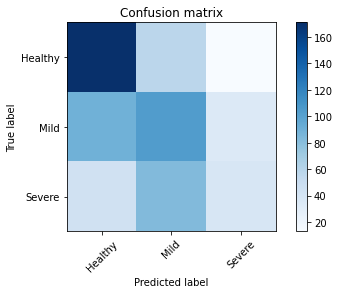

In [39]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

knn = KNeighborsClassifier(n_neighbors=41)
accuracy_knn_m = cross_val_score(knn, x_m, y_m, cv=5, scoring='accuracy')
f1_knn_m= cross_val_score(knn, x_m, y_m, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(knn, x_m, y_m, cv=5)
report_knn = metrics.classification_report(y_m, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y_m, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, outcomes_m)

print('Average accuracy of KNN:', np.average(accuracy_knn_m))
print ("f1 score: ", np.average(f1_knn_m))


# SVM

Confusion matrix, without normalization
[[143  70  29]
 [ 74  88  66]
 [ 35  73  57]]
              precision    recall  f1-score   support

           0       0.57      0.73      0.64       242
           1       0.45      0.53      0.48       228
           2       0.60      0.19      0.29       165

    accuracy                           0.52       635
   macro avg       0.54      0.48      0.47       635
weighted avg       0.53      0.52      0.49       635

Average accuracy of svm: 0.5023622047244094
f1 score : 0.4582978828785695


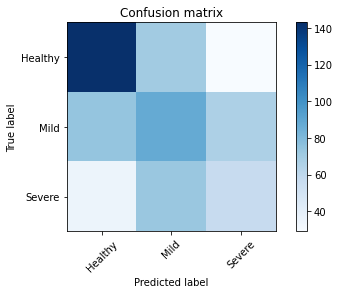

In [48]:
from sklearn.svm import SVC
svm = SVC()

accuracy_svm_m = cross_val_score(svm, x_m, y_m, cv=5, scoring='accuracy')
f1_svm_m = cross_val_score(svm, x_m, y_m, cv = 5, scoring='f1_weighted')
y_out_m = cross_val_predict(svm, x_m, y_out, cv=5)
#Report 
report_svm = metrics.classification_report(y_m, y_out_m)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y_m, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes_m)



print(report_svm)
print('Average accuracy of svm:', np.average(accuracy_svm_m))

print ("f1 score :", np.average(f1_svm_m))


# Decision tree
## grid search

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth" :np.arange(0,7)}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_grid,cv = 10)
tree_cv.fit(x_m,y_m)

print("tuned hyperparameters: (best parameters): ", tree_cv.best_params_)
print("accuracy: ", tree_cv.best_score_)

tuned hyperparameters: (best parameters):  {'max_depth': 5}
accuracy:  0.48360615079365077


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:54

Confusion matrix, without normalization
[[137  74  31]
 [ 67 112  49]
 [ 22  91  52]]
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       242
           1       0.40      0.49      0.44       228
           2       0.39      0.32      0.35       165

    accuracy                           0.47       635
   macro avg       0.47      0.46      0.46       635
weighted avg       0.48      0.47      0.47       635

Average accuracy of tree: 0.47401574803149604
f1 score: 0.47220139213814905


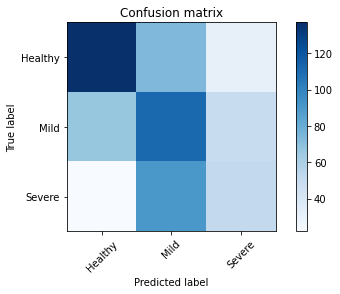

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5)
accuracy_tree_m = cross_val_score(tree, x_m, y_m, cv=5, scoring='accuracy')
f1_tree_m = cross_val_score(tree, x_m, y_m, cv = 5, scoring='f1_weighted')
y_out = cross_val_predict(tree, x_m, y_m, cv=5)
#Report 
report_tree = metrics.classification_report(y_m, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y_m, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes_m)


print(report_tree)
print('Average accuracy of tree:', np.average(accuracy_tree_m))

print ("f1 score:", np.average(f1_tree_m))


# Gradient boosting
## grid search

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier()
param_grid = {'n_estimators': np.arange(100, 200), 'learning_rate': np.arange(0.1, 0.5)}
gradient_cv = GridSearchCV(gradient,param_grid,cv = 5)
gradient_cv.fit(x_m,y_m)
print("tuned hyperparameters gradient: (best parameters): ", gradient_cv.best_params_)

tuned hyperparameters gradient: (best parameters):  {'learning_rate': 0.1, 'n_estimators': 130}


Confusion matrix, without normalization
[[143  71  28]
 [ 76  89  63]
 [ 36  70  59]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.58       242
           1       0.39      0.39      0.39       228
           2       0.39      0.36      0.37       165

    accuracy                           0.46       635
   macro avg       0.45      0.45      0.45       635
weighted avg       0.45      0.46      0.46       635

Average accuracy of grad: 0.4519685039370079
f1 score:  0.4510390326563659


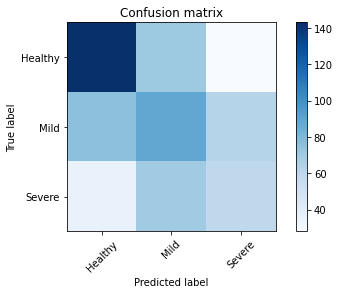

In [49]:
grad = GradientBoostingClassifier(n_estimators=130)
accuracy_grad_m = cross_val_score(grad, x_m, y_m, cv=5, scoring='accuracy')
f1_grad_m = cross_val_score(grad, x_m, y_m, cv = 5, scoring='f1_weighted')
y_out_g = cross_val_predict(grad, x_m, y_m, cv=5)
#Report 
report_grad = metrics.classification_report(y_m, y_out_g)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y_m, y_out_g)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes_m)

print(report_grad)
print('Average accuracy of grad:', np.average(accuracy_grad_m))
print ("f1 score: ", np.average(f1_grad_m))


Text(0.5, 0, 'Cross validation')

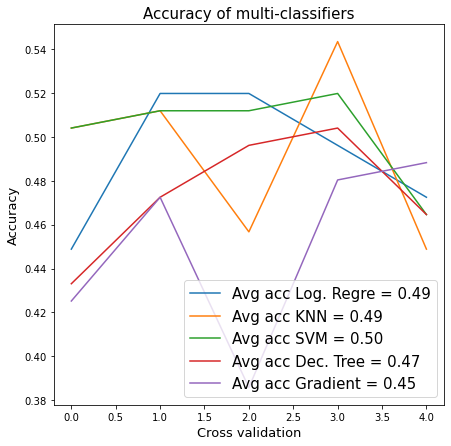

In [46]:
# Plot accuracy of three ensemble models
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('Accuracy of multi-classifiers', fontsize = 15)
plt.plot(accuracy_reg_m,label = 'Avg acc Log. Regre = %0.2f' % np.average(accuracy_reg_m))

plt.plot(accuracy_knn_m,label = 'Avg acc KNN = %0.2f' % np.average(accuracy_knn_m))
plt.plot(accuracy_svm_m, label = 'Avg acc SVM = %0.2f' % np.average(accuracy_svm_m))
plt.plot(accuracy_tree_m, label = 'Avg acc Dec. Tree = %0.2f' % np.average(accuracy_tree_m))

plt.plot(accuracy_grad_m, label = 'Avg acc Gradient = %0.2f' % np.average(accuracy_grad_m))
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('Accuracy', fontsize=13)
plt.xlabel('Cross validation', fontsize=13)

Text(0.5, 0, 'Cross validation')

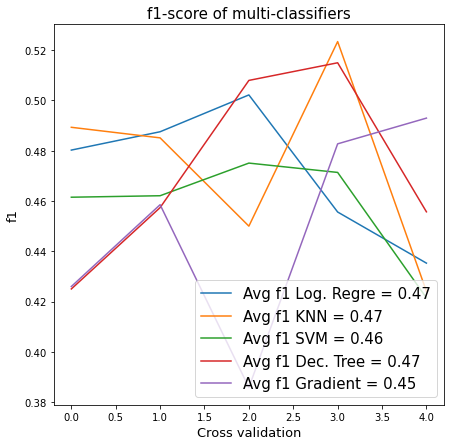

In [47]:
# Plot f1 ofall models
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('f1-score of multi-classifiers', fontsize = 15)
plt.plot(f1_reg_m,label = 'Avg f1 Log. Regre = %0.2f' % np.average(f1_reg_m))

plt.plot(f1_knn_m,label = 'Avg f1 KNN = %0.2f' % np.average(f1_knn_m))
plt.plot(f1_svm_m, label = 'Avg f1 SVM = %0.2f' % np.average(f1_svm_m))
plt.plot(f1_tree_m, label = 'Avg f1 Dec. Tree = %0.2f' % np.average(f1_tree_m))

plt.plot(f1_grad_m, label = 'Avg f1 Gradient = %0.2f' % np.average(f1_grad_m))
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('f1', fontsize=13)
plt.xlabel('Cross validation', fontsize=13)